In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# for handling imbalancing
from imblearn.under_sampling import NearMiss
from keras.utils import np_utils

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , confusion_matrix

import keras
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization

# for learning rate decay
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D,MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD

import warnings
warnings.filterwarnings('ignore')

ImportError: cannot import name 'np_utils' from 'keras.utils' (/usr/local/lib/python3.10/dist-packages/keras/utils/__init__.py)

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
print(tf.__version__)

2.15.0


In [ ]:
mnist = keras.datasets.mnist
(train_images_mnist,train_labels_mnist),(test_images_mnist,test_labels_mnist) = mnist.load_data()
# images are reshaped to be used by the flow method of a keras ImageGenerator
train_images_mnist = np.reshape(train_images_mnist,(train_images_mnist.shape[0],28,28,1))
test_images_mnist = np.reshape(test_images_mnist,(test_images_mnist.shape[0],28,28,1))

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
az_data_path = '/datasets/handwritingdataset'
AZ_data = pd.read_csv("/A_Z Handwritten Data.csv")
# the first column contains label values, while the remaining are the flattened array of 28 x 28 image pixels
AZ_labels = AZ_data.values[:,0]
AZ_images = AZ_data.values[:,1:]
# images are reshaped to be used by the flow method of a keras ImageGenerator
AZ_images = np.reshape(AZ_images,(AZ_images.shape[0],28,28,1))

FileNotFoundError: [Errno 2] No such file or directory: '/A_Z Handwritten Data.csv'

In [ ]:
# join datasets
# split AZ data in train and test
from sklearn.model_selection import train_test_split

test_size = float(len(test_labels_mnist))/len(train_labels_mnist)
print(f'test set size: {test_size}')
train_images_AZ, test_images_AZ, train_labels_AZ, test_labels_AZ = train_test_split(AZ_images,AZ_labels, test_size=test_size)
#shift mnist labels
train_labels_mnist = train_labels_mnist + max(AZ_labels)+1
test_labels_mnist = test_labels_mnist + max(AZ_labels)+1

# concatenate datasets
train_images = np.concatenate((train_images_AZ,train_images_mnist),axis=0)
train_labels = np.concatenate((train_labels_AZ,train_labels_mnist))
test_images = np.concatenate((test_images_AZ,test_images_mnist),axis=0)
test_labels = np.concatenate((test_labels_AZ,test_labels_mnist))

print('Data ready')

test set size: 0.16666666666666666
Data ready


In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron.
    tf.keras.layers.Dense(len(np.unique(train_labels)), activation='softmax')
])

model.compile(optimizer=RMSprop(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 512)               4

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=15,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=0.2,
      horizontal_flip=False,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Flow training images in batches using generator
train_generator = train_datagen.flow(train_images, train_labels, batch_size=50, shuffle=True)
validation_generator = test_datagen.flow(test_images, test_labels, batch_size=50, shuffle=True)

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=500,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)
model.save('model_v2')

Epoch 1/100
500/500 - 31s - loss: 1.5368 - accuracy: 0.5224 - val_loss: 0.4820 - val_accuracy: 0.8836 - 31s/epoch - 61ms/step
Epoch 2/100
500/500 - 28s - loss: 0.7766 - accuracy: 0.7685 - val_loss: 0.2682 - val_accuracy: 0.9224 - 28s/epoch - 57ms/step
Epoch 3/100
500/500 - 29s - loss: 0.5017 - accuracy: 0.8518 - val_loss: 0.1718 - val_accuracy: 0.9540 - 29s/epoch - 58ms/step
Epoch 4/100
500/500 - 30s - loss: 0.4118 - accuracy: 0.8757 - val_loss: 0.1601 - val_accuracy: 0.9528 - 30s/epoch - 60ms/step
Epoch 5/100
500/500 - 29s - loss: 0.3434 - accuracy: 0.8973 - val_loss: 0.1764 - val_accuracy: 0.9532 - 29s/epoch - 59ms/step
Epoch 6/100
500/500 - 30s - loss: 0.3125 - accuracy: 0.9074 - val_loss: 0.1226 - val_accuracy: 0.9668 - 30s/epoch - 59ms/step
Epoch 7/100
500/500 - 28s - loss: 0.2800 - accuracy: 0.9155 - val_loss: 0.1082 - val_accuracy: 0.9684 - 28s/epoch - 57ms/step
Epoch 8/100
500/500 - 29s - loss: 0.2641 - accuracy: 0.9216 - val_loss: 0.0941 - val_accuracy: 0.9700 - 29s/epoch - 58

KeyboardInterrupt: 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [ ]:
az_data = pd.read_csv("/content/A_Z Handwritten Data.csv")
AZ_labels = az_data.iloc[:, 0]
AZ_images = az_data.iloc[:, 1:]


In [ ]:
# Normalize pixel values
scaler = MinMaxScaler()
AZ_images_normalized = scaler.fit_transform(AZ_images)

In [ ]:
# Reshape images
AZ_images_reshaped = AZ_images_normalized.reshape(-1, 28, 28, 1)  # Assuming grayscale images


In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(AZ_images_reshaped, AZ_labels, test_size=0.2, random_state=42)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(26, activation='softmax')  # 26 classes for A-Z characters
])

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
182/182 [==============================] - 4s 16ms/step - loss: nan - accuracy: 0.9957 - val_loss: nan - val_accuracy: 1.0000
Epoch 2/10
182/182 [==============================] - 3s 19ms/step - loss: nan - accuracy: 1.0000 - val_loss: nan - val_accuracy: 1.0000
Epoch 3/10
182/182 [==============================] - 3s 15ms/step - loss: nan - accuracy: 1.0000 - val_loss: nan - val_accuracy: 1.0000
Epoch 4/10
182/182 [==============================] - 3s 15ms/step - loss: nan - accuracy: 1.0000 - val_loss: nan - val_accuracy: 1.0000
Epoch 5/10
182/182 [==============================] - 3s 17ms/step - loss: nan - accuracy: 1.0000 - val_loss: nan - val_accuracy: 1.0000
Epoch 6/10
182/182 [==============================] - 4s 19ms/step - loss: nan - accuracy: 1.0000 - val_loss: nan - val_accuracy: 1.0000
Epoch 7/10
182/182 [==============================] - 3s 15ms/step - loss: nan - accuracy: 1.0000 - val_loss: nan - val_accuracy: 1.0000
Epoch 8/10
182/182 [=====================

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')


46/46 [==============================] - 1s 11ms/step - loss: nan - accuracy: 1.0000
Test Accuracy: 1.0


In [ ]:
model.save('character_recognition_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.save('character_recognition_model.keras')

**NEW MODEL**

In [ ]:
import numpy as np
import pandas as pd
from keras.utils import to_categorical
from keras.datasets import mnist
from sklearn.utils import shuffle
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Path to your CSV file in Google Drive
file_path = '/content/drive/MyDrive/A_Z.csv'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_csv(file_path).astype("float32")
dataset.rename(columns={'0': "label"}, inplace=True)

In [ ]:
letter_x = dataset.drop("label", axis=1)
letter_y = dataset["label"]
(digit_train_x, digit_train_y), (digit_test_x, digit_test_y) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
letter_x = letter_x.values

In [ ]:
print(letter_x.shape, letter_y.shape)
print(digit_train_x.shape, digit_train_y.shape)
print(digit_test_x.shape, digit_test_y.shape)

(372450, 784) (372450,)
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [ ]:
digit_data = np.concatenate((digit_train_x, digit_test_x))
digit_target = np.concatenate((digit_train_y, digit_test_y))

print(digit_data.shape, digit_target.shape)

(70000, 28, 28) (70000,)


In [ ]:
digit_target += 26

In [ ]:
data = []

for flatten in letter_x:
  image = np.reshape(flatten, (28, 28, 1))
  data.append(image)

letter_data = np.array(data, dtype=np.float32)
letter_target = letter_y

In [ ]:
digit_data = np.reshape(digit_data, (digit_data.shape[0], digit_data.shape[1], digit_data.shape[2], 1))

In [ ]:
print(letter_data.shape, letter_target.shape)
print(digit_data.shape, digit_target.shape)

(372450, 28, 28, 1) (372450,)
(70000, 28, 28, 1) (70000,)


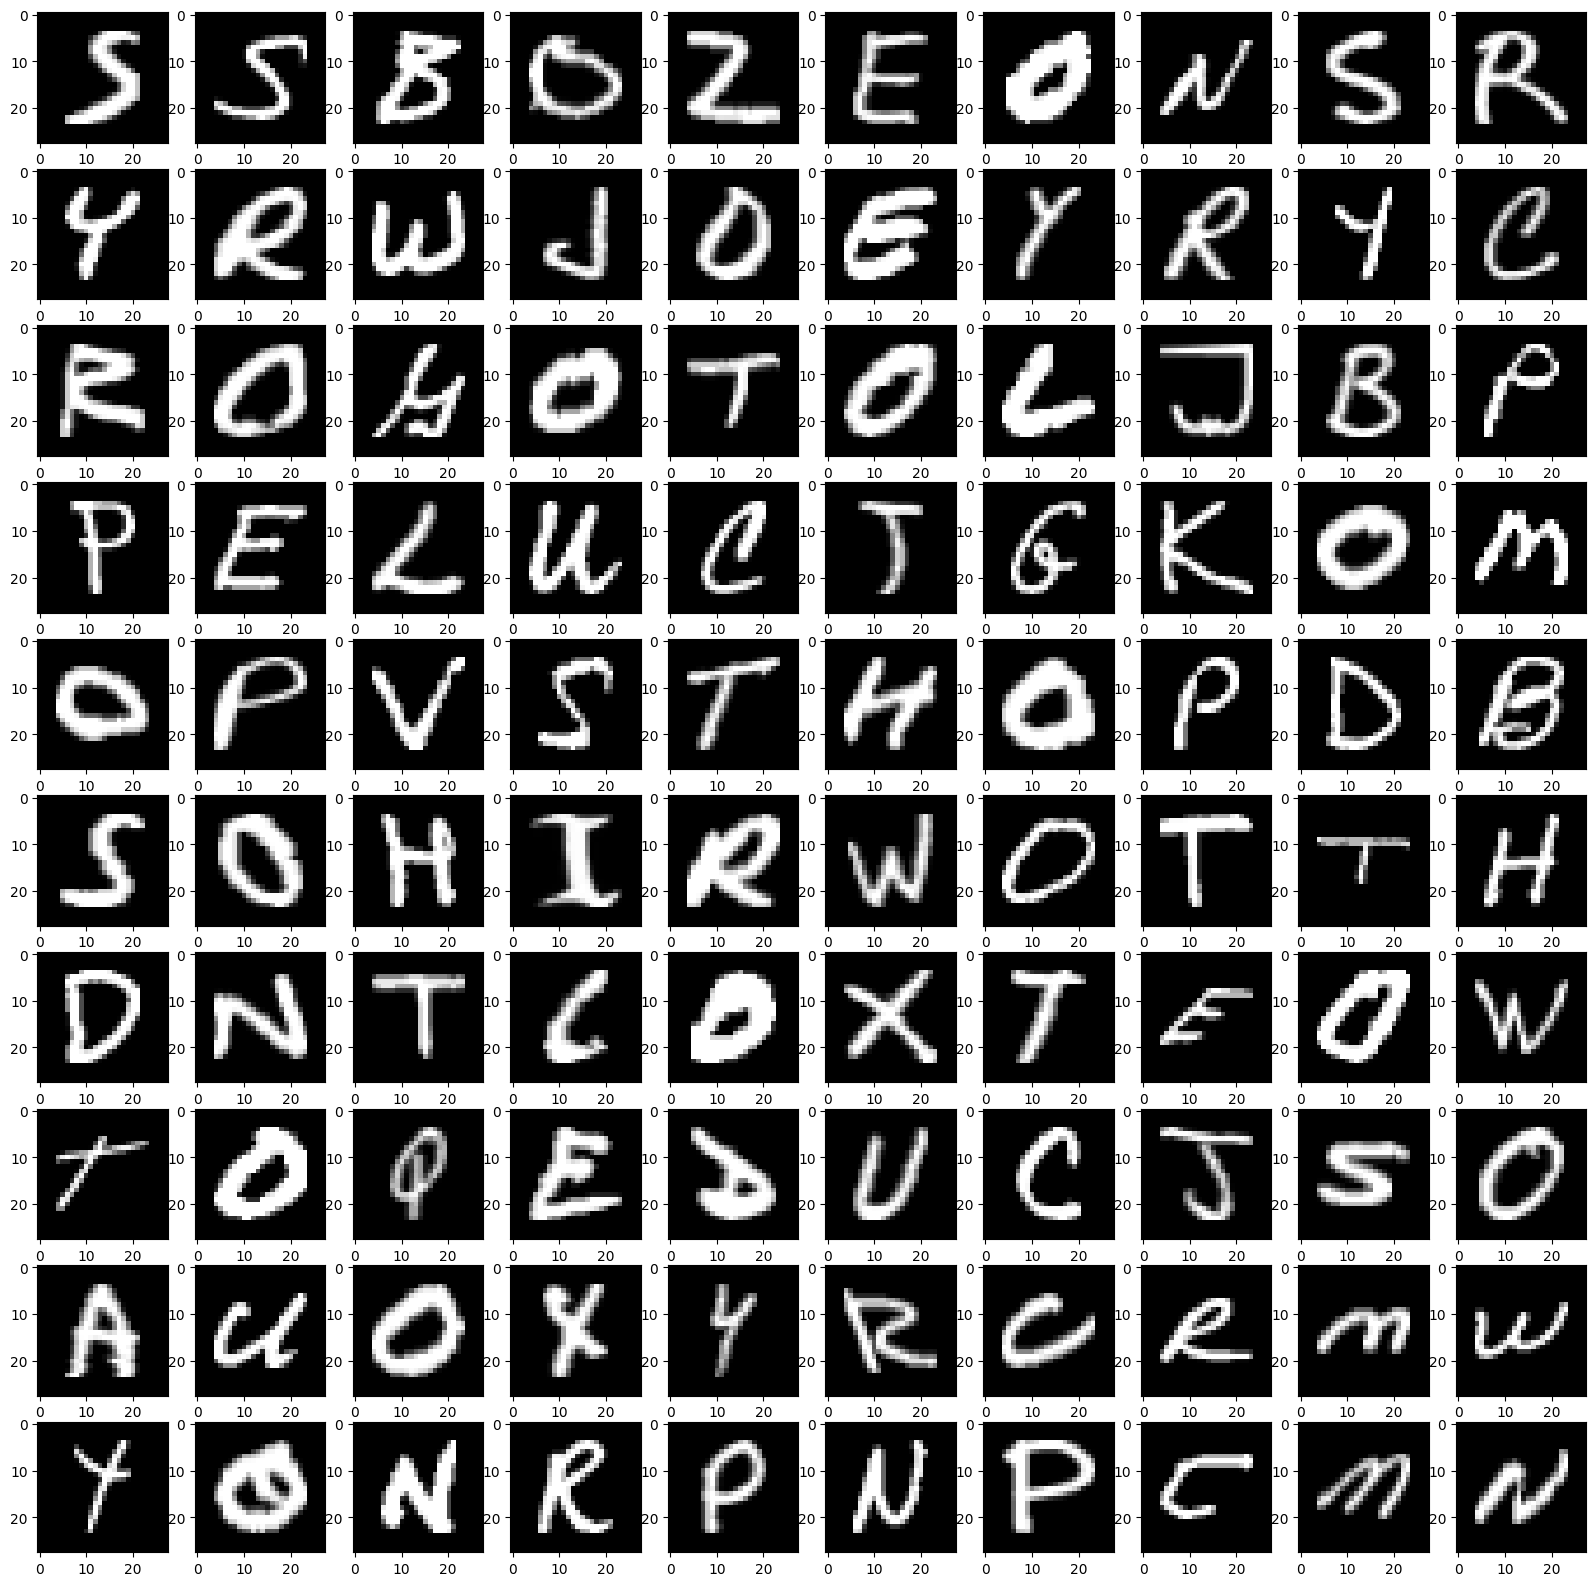

In [ ]:
import matplotlib.pyplot as plt
shuffled_data = shuffle(letter_data)
rows, cols = 10, 10

plt.figure(figsize=(20, 20))

for i in range(rows * cols):
  plt.subplot(cols, rows, i+1)
  plt.imshow(shuffled_data[i].reshape(28, 28), interpolation="nearest", cmap="gray")

plt.show()

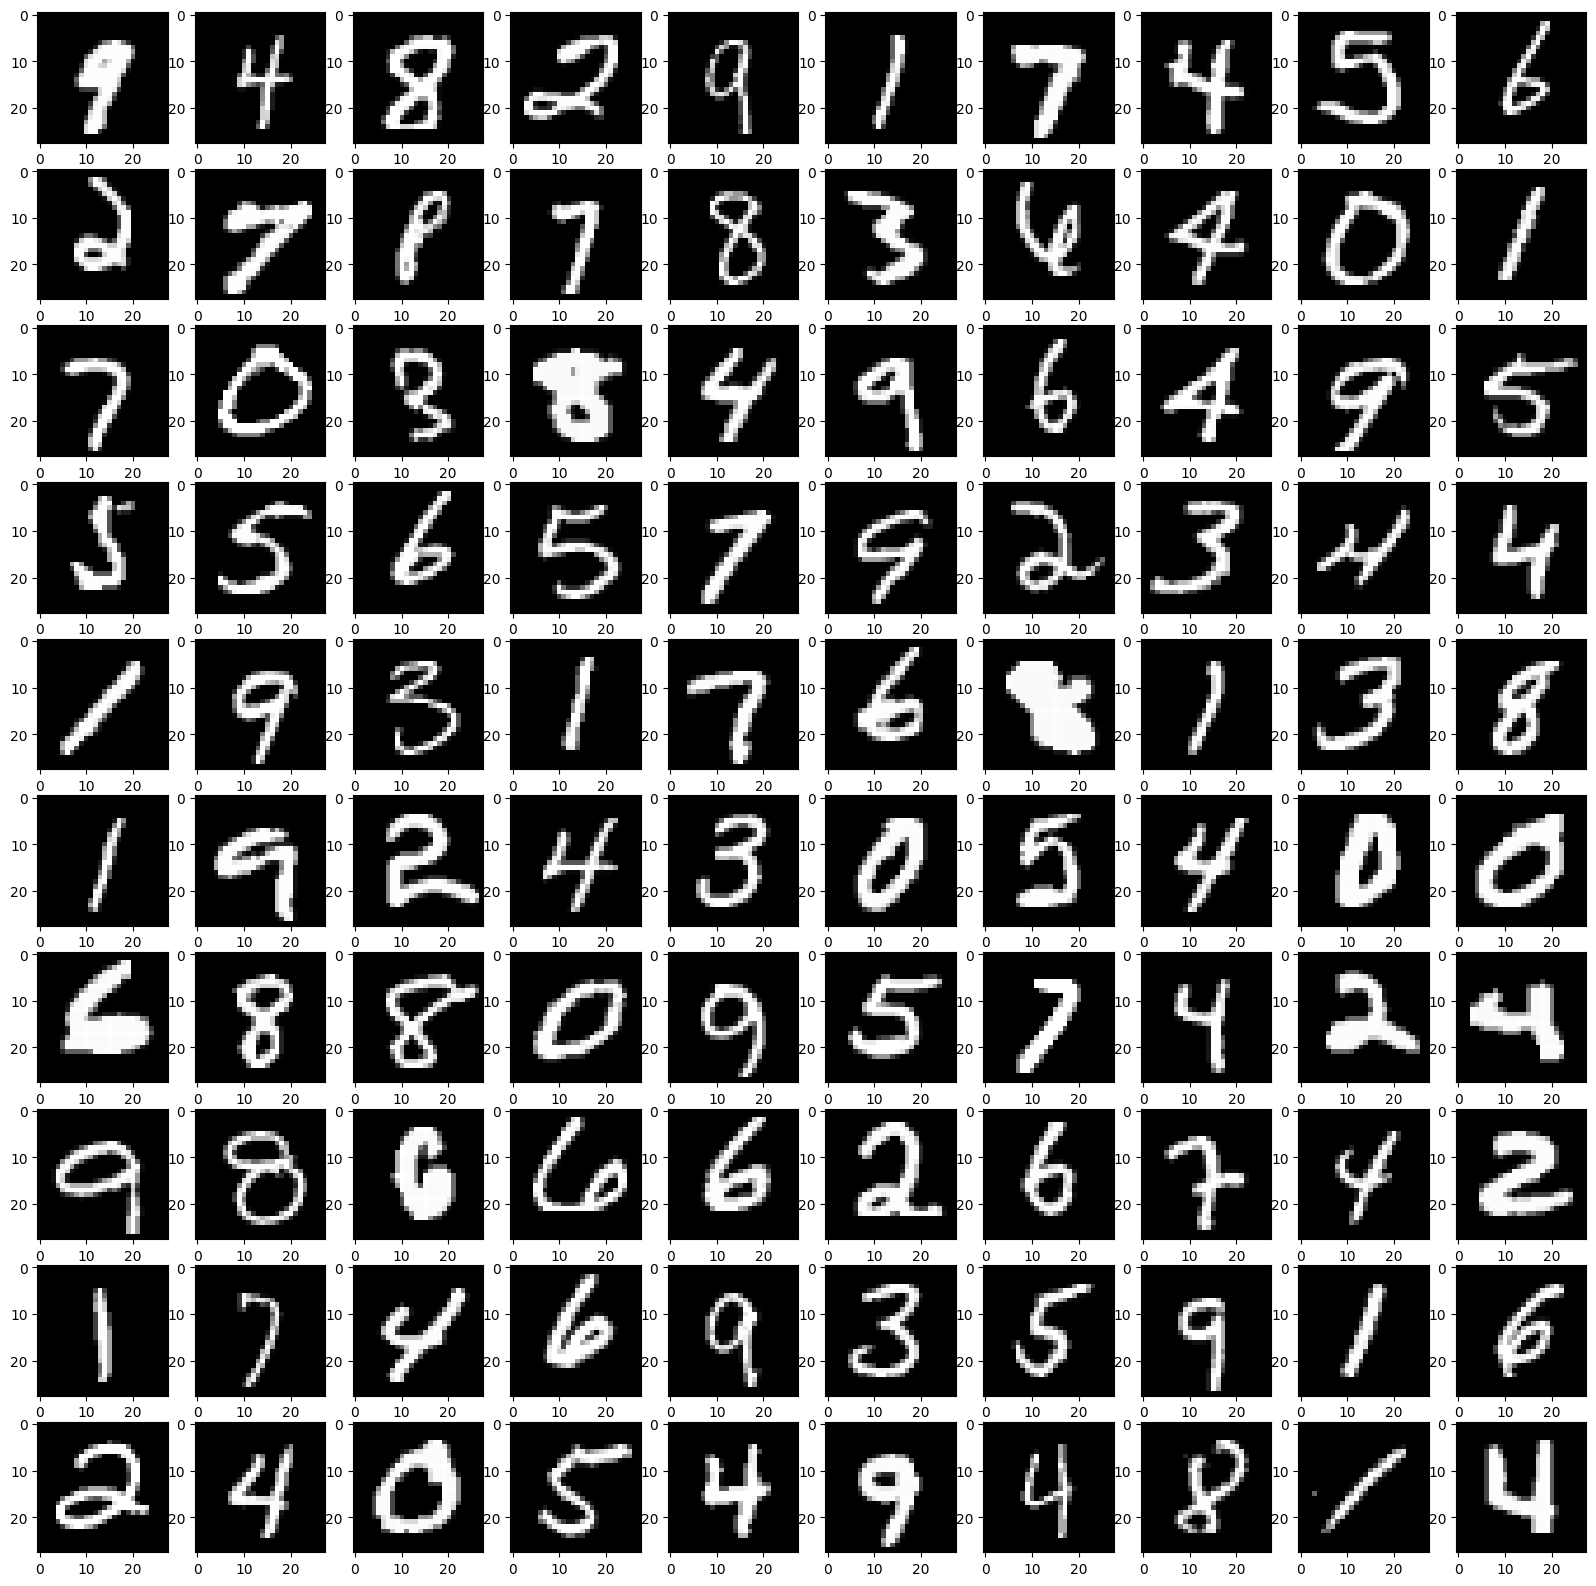

In [ ]:
shuffled_data = shuffle(digit_data)
rows, cols = 10, 10

plt.figure(figsize=(20, 20))

for i in range(rows * cols):
  plt.subplot(cols, rows, i+1)
  plt.imshow(shuffled_data[i].reshape(28, 28), interpolation="nearest", cmap="gray")

plt.show()

In [ ]:
data = np.concatenate((digit_data, letter_data))
target = np.concatenate((digit_target, letter_target))

print(data.shape, target.shape)

(442450, 28, 28, 1) (442450,)


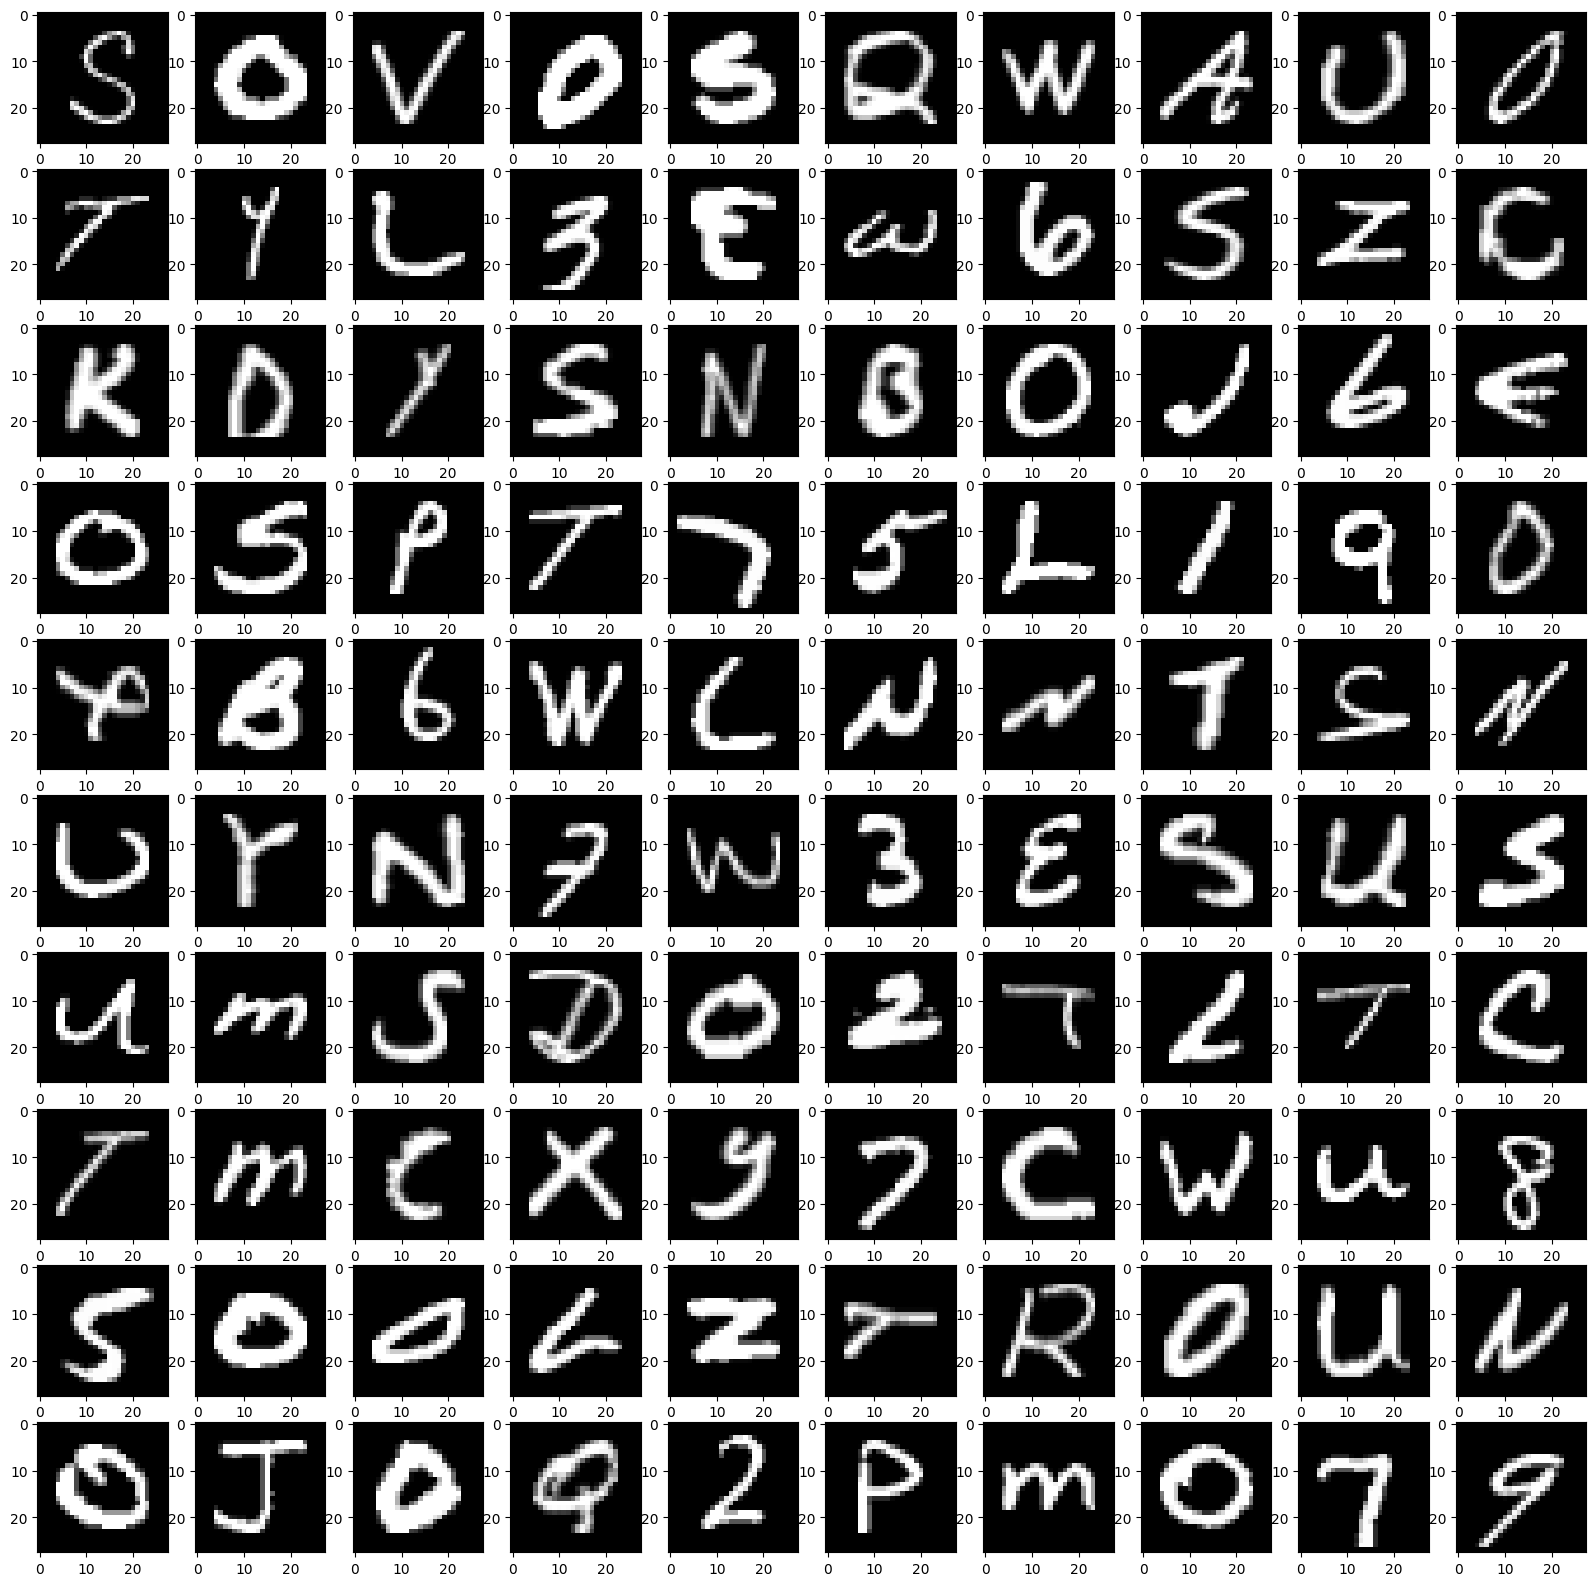

In [ ]:
shuffled_data = shuffle(data)
rows, cols = 10, 10

plt.figure(figsize=(20, 20))

for i in range(rows * cols):
  plt.subplot(cols, rows, i+1)
  plt.imshow(shuffled_data[i].reshape(28, 28), interpolation="nearest", cmap="gray")

plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(data, target, test_size=0.2)

In [ ]:
print(train_data.shape, train_labels.shape)
print(test_data.shape, test_labels.shape)

(353960, 28, 28, 1) (353960,)
(88490, 28, 28, 1) (88490,)


In [ ]:
import numpy as np
from keras.utils import to_categorical

# Find the number of unique classes in train_labels
num_classes = len(np.unique(train_labels))

# Normalize train_data and test_data (assuming they are already loaded)
train_data = train_data / 255.0
test_data = test_data / 255.0

# Perform one-hot encoding
train_labels = to_categorical(train_labels, num_classes=num_classes)
test_labels = to_categorical(test_labels, num_classes=num_classes)


In [ ]:
print(train_data.shape, test_data.shape)
print(train_labels.shape, test_labels.shape)

(353960, 28, 28, 1) (88490, 28, 28, 1)
(353960, 36) (88490, 36)


In [ ]:
train_label_counts = [0 for i in range(36)]
test_label_counts = [0 for i in range(36)]

for i in range(train_data.shape[0]):
  train_label_counts[np.argmax(train_labels[i])] += 1

for i in range(test_data.shape[0]):
  test_label_counts[np.argmax(test_labels[i])] += 1

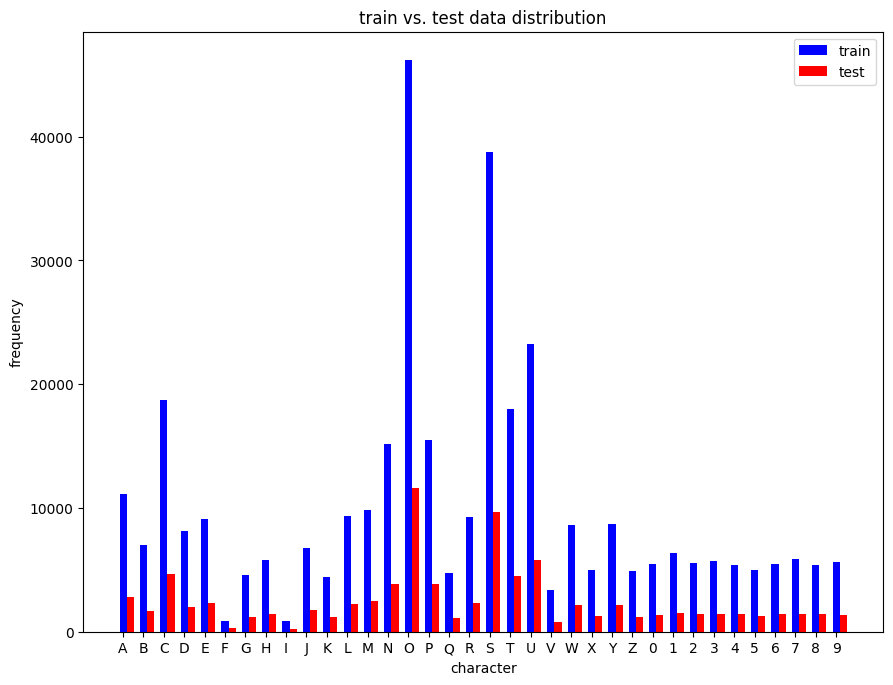

In [ ]:
frequency = [
    train_label_counts, test_label_counts
]

fig =  plt.figure(figsize=(8, 6))
ax = fig.add_axes([0, 0, 1, 1])
x = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

plt.xticks(range(len(frequency[0])), x)
plt.title("train vs. test data distribution")
plt.xlabel("character")
plt.ylabel("frequency")

ax.bar(np.arange(len(frequency[0])), frequency[0], color="b", width=0.35)
ax.bar(np.arange(len(frequency[1])) + 0.35, frequency[1], color="r", width=0.35)
ax.legend(labels=["train", "test"])

In [ ]:
import numpy as np
import visualkeras as vk # pip install visualkeras
import pandas as pd
import seaborn as sn
from keras.models import Sequential
from matplotlib import pyplot as plt
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

In [ ]:
pip install visualkeras

ERROR: Operation cancelled by user


In [ ]:
model = Sequential()

model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation="relu"))
model.add(BatchNormalization())

model.add(Conv2D(32, (5, 5), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

model.add(BatchNormalization())
model.add(Flatten())

model.add(Dense(256, activation="relu"))
model.add(Dense(36, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 batch_normalization_3 (Bat  (None, 24, 24, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_3 (Conv2D)           (None, 20, 20, 32)        25632     
                                                                 
 batch_normalization_4 (Bat  (None, 20, 20, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 32)        0         
 g2D)                                                            
                                                      

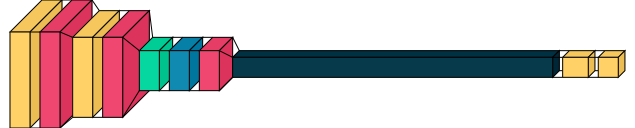

In [ ]:
vk.layered_view(model)

In [ ]:
best_loss_checkpoint = ModelCheckpoint(
    filepath="/content/drive/MyDrive/MAIN PROJECT/best_loss.h5",
    monitor="loss",
    save_best_only=True,
    save_weights_only=True,
    mode="min"
)

best_val_loss_checkpoint = ModelCheckpoint(
    filepath="/content/drive/MyDrive/MAIN PROJECT/best_val_loss_model.h5",
    monitor="val_loss",
    save_best_only=True,
    save_weights_only=True,
    mode="min"
)

In [ ]:
history = model.fit(
    train_data,
    train_labels,
    validation_data=(test_data, test_labels),
    epochs=10,
    batch_size=200,
    callbacks=[best_loss_checkpoint, best_val_loss_checkpoint]
)

Epoch 1/10
1770/1770 [==============================] - 594s 335ms/step - loss: 0.1581 - accuracy: 0.9546 - val_loss: 0.0788 - val_accuracy: 0.9776
Epoch 2/10
1770/1770 [==============================] - 579s 327ms/step - loss: 0.0704 - accuracy: 0.9789 - val_loss: 0.0732 - val_accuracy: 0.9791
Epoch 3/10
1770/1770 [==============================] - 580s 328ms/step - loss: 0.0515 - accuracy: 0.9838 - val_loss: 0.0581 - val_accuracy: 0.9831
Epoch 4/10
1770/1770 [==============================] - 579s 327ms/step - loss: 0.0394 - accuracy: 0.9873 - val_loss: 0.0536 - val_accuracy: 0.9858
Epoch 5/10
1770/1770 [==============================] - 583s 329ms/step - loss: 0.0330 - accuracy: 0.9892 - val_loss: 0.0576 - val_accuracy: 0.9849
Epoch 6/10
1770/1770 [==============================] - 574s 325ms/step - loss: 0.0273 - accuracy: 0.9910 - val_loss: 0.0493 - val_accuracy: 0.9870
Epoch 7/10
1770/1770 [==============================] - 574s 324ms/step - loss: 0.0235 - accuracy: 0.9921 - val_

In [ ]:
model.save('recognition_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


ANOTHER MODEL

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, LSTM, TimeDistributed

def hybrid_cnn_rnn(input_shape, num_classes):
    # Input layer for image data
    image_input = Input(shape=input_shape, name='image_input')

    # CNN component for spatial feature extraction
    cnn_layer1 = Conv2D(32, (3, 3), activation='relu', padding='same')(image_input)
    cnn_layer1 = MaxPooling2D((2, 2))(cnn_layer1)

    cnn_layer2 = Conv2D(64, (3, 3), activation='relu', padding='same')(cnn_layer1)
    cnn_layer2 = MaxPooling2D((2, 2))(cnn_layer2)

    cnn_layer3 = Conv2D(128, (3, 3), activation='relu', padding='same')(cnn_layer2)
    cnn_layer3 = MaxPooling2D((2, 2))(cnn_layer3)

    # Flatten CNN output to feed into RNN
    cnn_output = Flatten()(cnn_layer3)

    # RNN component for sequence modeling
    rnn_input = tf.expand_dims(cnn_output, axis=-1)  # Add a time dimension
    rnn_layer = LSTM(128, return_sequences=True)(rnn_input)

    # Time-distributed dense layer for sequence-to-sequence mapping
    time_distributed_layer = TimeDistributed(Dense(num_classes, activation='softmax'))(rnn_layer)

    # Define model inputs and outputs
    inputs = image_input
    outputs = time_distributed_layer

    # Create and compile the model
    model = Model(inputs=inputs, outputs=outputs, name='hybrid_cnn_rnn')
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Example usage:
input_shape = (64, 64, 1)  # Example input shape for grayscale images
num_classes = 26  # Example number of classes (letters A-Z)
model = hybrid_cnn_rnn(input_shape, num_classes)
model.summary()


Model: "hybrid_cnn_rnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image_input (InputLayer)    [(None, 64, 64, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)    

In [ ]:
import visualkeras as vk

# Assuming 'model' is already defined and compiled
vk.layered_view(model)


TypeError: 'int' object is not iterable

In [ ]:
from visualkeras import layered_view



In [ ]:
pip install visualkeras


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 5.3 MB/s eta 0:00:00


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
best_loss_checkpoint2 = ModelCheckpoint(
    filepath="/content/drive/MyDrive/MAIN PROJECT/best_loss.h5",
    monitor="loss",
    save_best_only=True,
    save_weights_only=True,
    mode="min"
)

best_val_loss_checkpoint2 = ModelCheckpoint(
    filepath="/content/drive/MyDrive/MAIN PROJECT/best_val_loss_model.h5",
    monitor="val_loss",
    save_best_only=True,
    save_weights_only=True,
    mode="min"
)

In [ ]:
history = model.fit(
    train_data,
    train_labels,
    validation_data=(test_data, test_labels),
    epochs=10,
    batch_size=32,
    callbacks=[best_loss_checkpoint2, best_val_loss_checkpoint2]
)

NameError: name 'train_data' is not defined